In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=100
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('csv_files/housing_clean_2.csv')

In [45]:
df

,Unnamed: 0,price,space,room,bedroom,furniture,latitude,longitude,city_area,floor,max_floor,apartment_type,renovation_type,balcony
0,0,107100,28.00,1,1,0,41.724521,44.753788,Saburtalo District,11,11,new,newly renovated,1
1,2,257000,72.00,3,1,1,41.689502,44.820050,Isani District,15,16,new,newly renovated,0
2,3,157200,53.00,2,1,0,41.677084,44.817222,Krtsanisi District,2,4,new,white frame,1
3,4,237200,80.00,3,2,0,41.682883,44.823815,Krtsanisi District,3,4,new,white frame,1
4,5,158200,60.00,2,1,0,41.768762,44.724123,Saburtalo District,14,16,old,newly renovated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29199,41658,179200,75.00,2,1,0,41.761308,44.789730,Nadzaladevi District,11,22,construction,green frame,1
29200,41659,126600,53.00,2,1,0,41.731884,44.836876,Other,8,12,new,green frame,1
29201,41660,62400,25.75,1,1,0,41.731884,44.836876,Other,7,12,new,green frame,1
29202,41661,167200,70.00,3,2,0,41.731884,44.836876,Other,4,12,new,green frame,1


# Part 1 (EDA and preprocessing) 

In [46]:
df.isna().sum()

Unnamed: 0           0
price                0
space                0
room                 0
bedroom              0
furniture            0
latitude           246
longitude          246
city_area            0
floor                0
max_floor            0
apartment_type      10
renovation_type      0
balcony              0
dtype: int64

In [47]:
df['PriceSQMT']=df['price']/df['space']

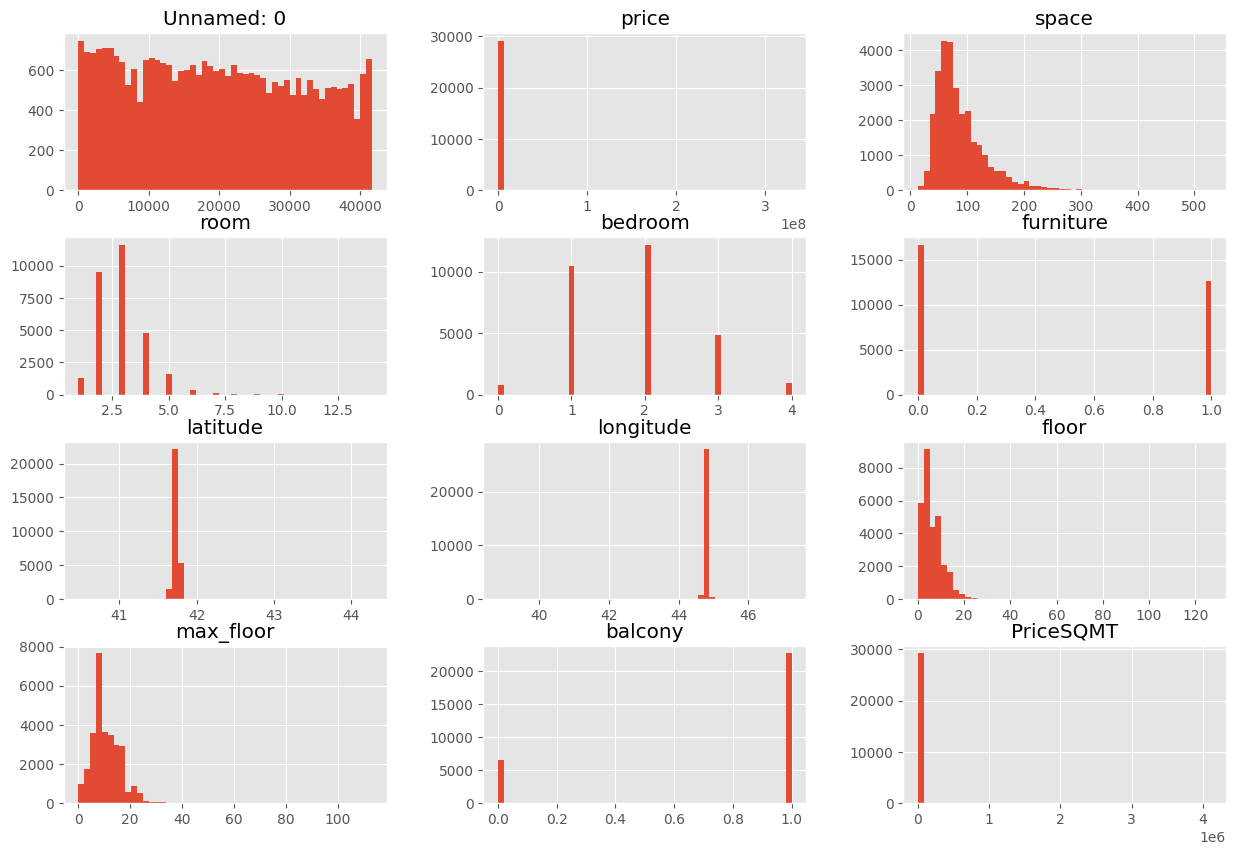

In [48]:
df.hist(bins=50,figsize=(15,10))
plt.show()

In [49]:
df=df.query('100<PriceSQMT<5000 and 0<floor<40 and 1<max_floor and room<7') #remove outliers
df=df.dropna() # drop nan values, as their total number is not significantly high. We can't impute Long and Lat.
df=df.drop(columns=['Unnamed: 0','price','space']) # remove unnecessary columns

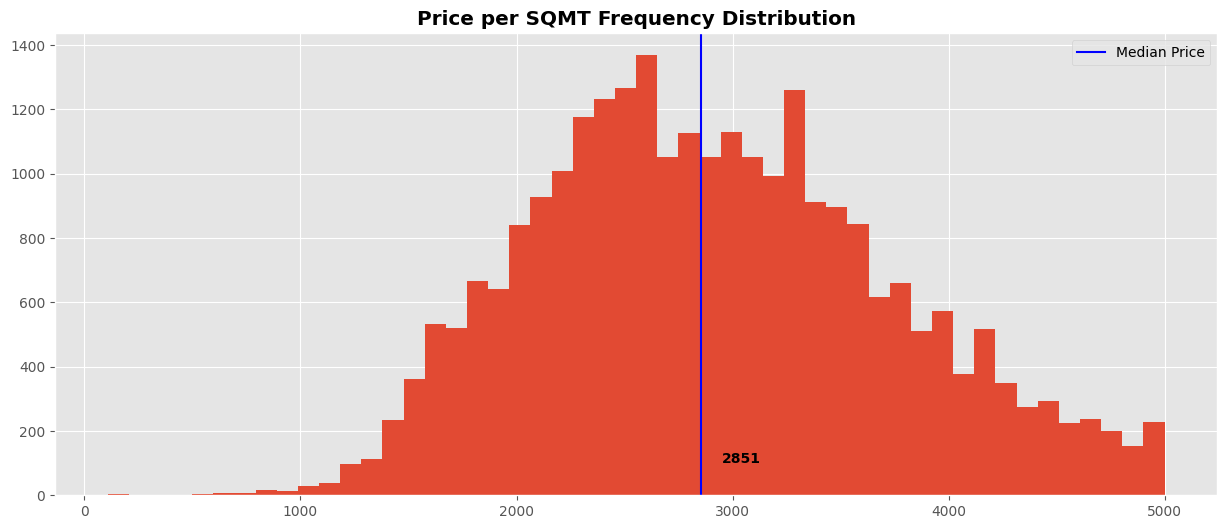

In [50]:
plt.figure(figsize=(15,6))
df['PriceSQMT'].hist(bins=50)
plt.axvline(df['PriceSQMT'].median(),label='Median Price',color='blue')
plt.title('Price per SQMT Frequency Distribution',fontweight='bold')
plt.text(df['PriceSQMT'].median()+100,100,int(df['PriceSQMT'].median()),fontweight='bold')
plt.legend()
plt.show()

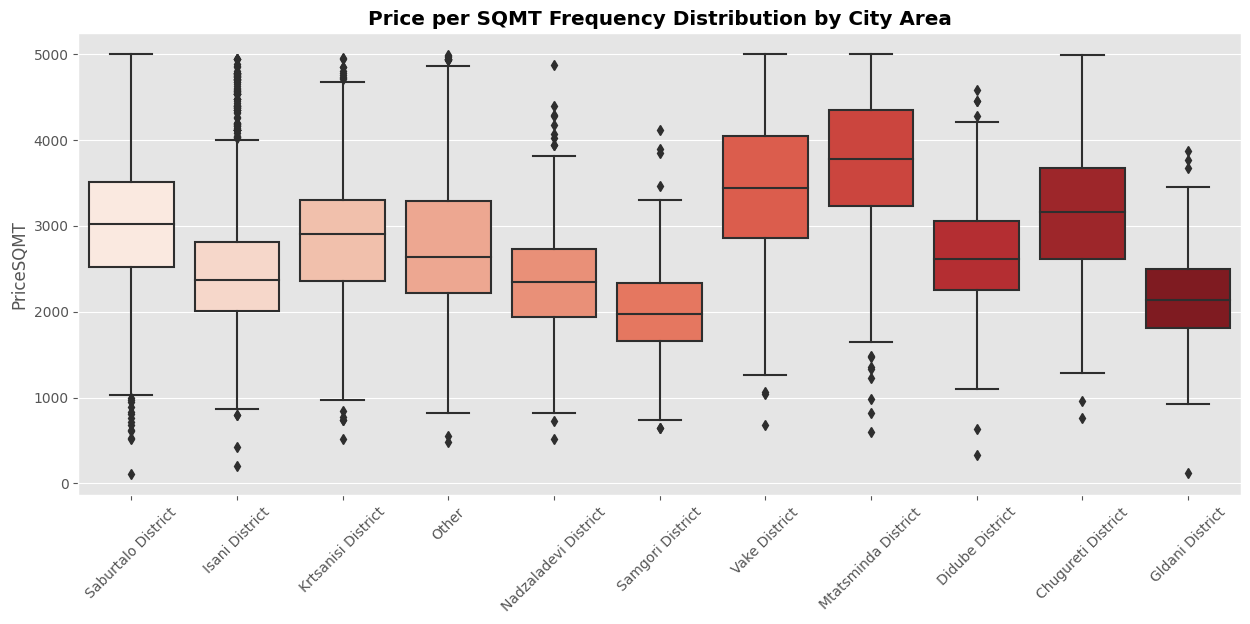

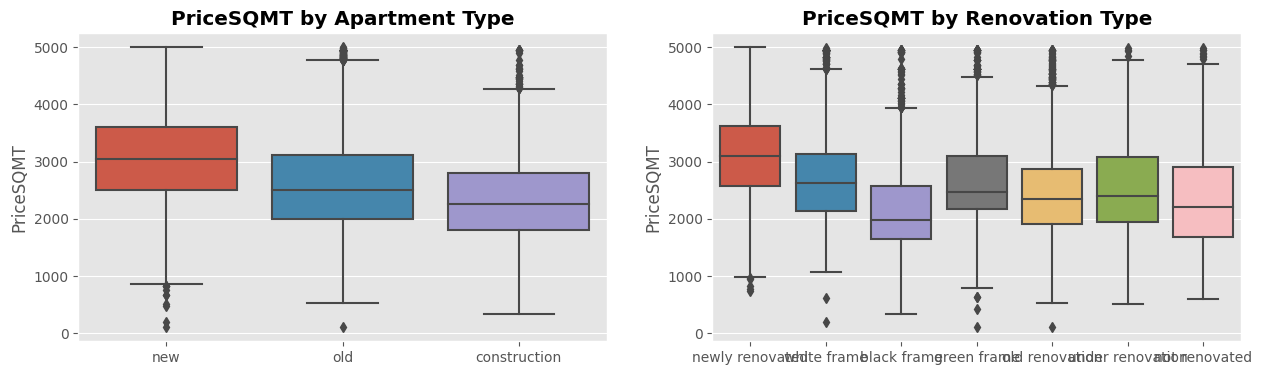

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(df,x='city_area',y='PriceSQMT',palette='Reds')
plt.title('Price per SQMT Frequency Distribution by City Area',fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(df,x='apartment_type',y='PriceSQMT',ax=ax1)
ax1.set_title('PriceSQMT by Apartment Type',fontweight='bold')
ax1.set_xlabel('')

sns.boxplot(df,x='renovation_type',y='PriceSQMT',ax=ax2)
ax2.set_title('PriceSQMT by Renovation Type',fontweight='bold')
ax2.set_xlabel('')

plt.show()

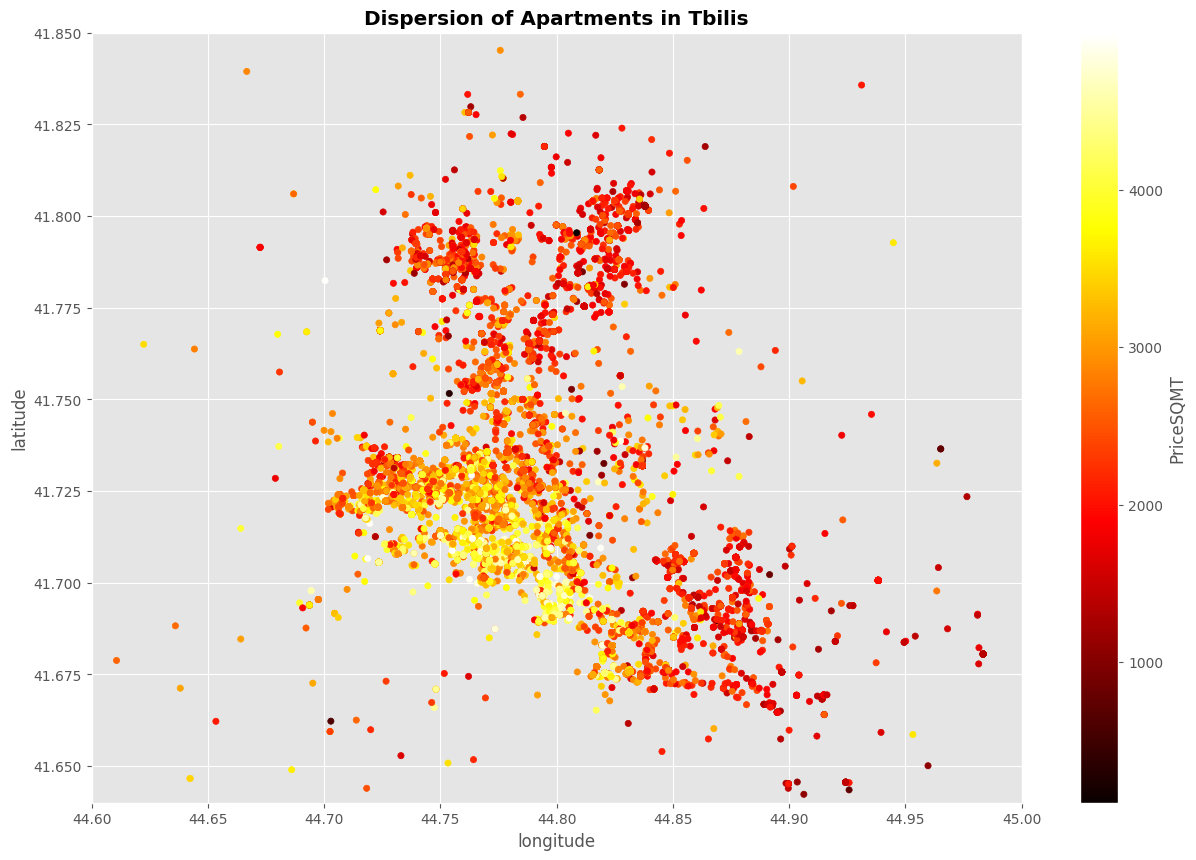

In [52]:
df.plot.scatter(x='longitude',y='latitude',c='PriceSQMT',cmap='hot',figsize=(15,10))
plt.title('Dispersion of Apartments in Tbilis',fontweight='bold')
plt.xlim(44.6,45)
plt.ylim(41.64,41.85)
plt.show()

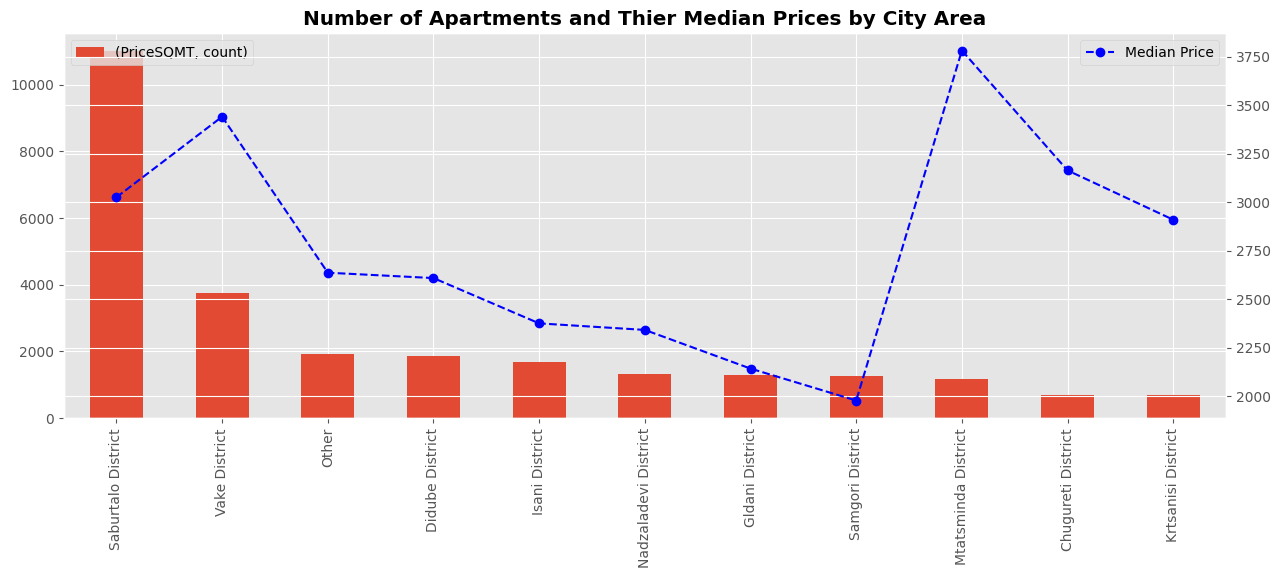

In [53]:
g=df.groupby('city_area').agg({'PriceSQMT':['count','median']}).sort_values(('PriceSQMT',  'count'),ascending=False)

fig,ax=plt.subplots(figsize=(15,5))
g.plot.bar(ax=ax,y=('PriceSQMT',  'count'))
ax2=ax.twinx()
g.plot.line(ax=ax2,y=('PriceSQMT',  'median'),color='b',marker='o',ls='--',label='Median Price')
ax.set_title('Number of Apartments and Thier Median Prices by City Area',fontweight='bold')
ax.legend(loc='upper left')
ax.set_xlabel('')
plt.show()

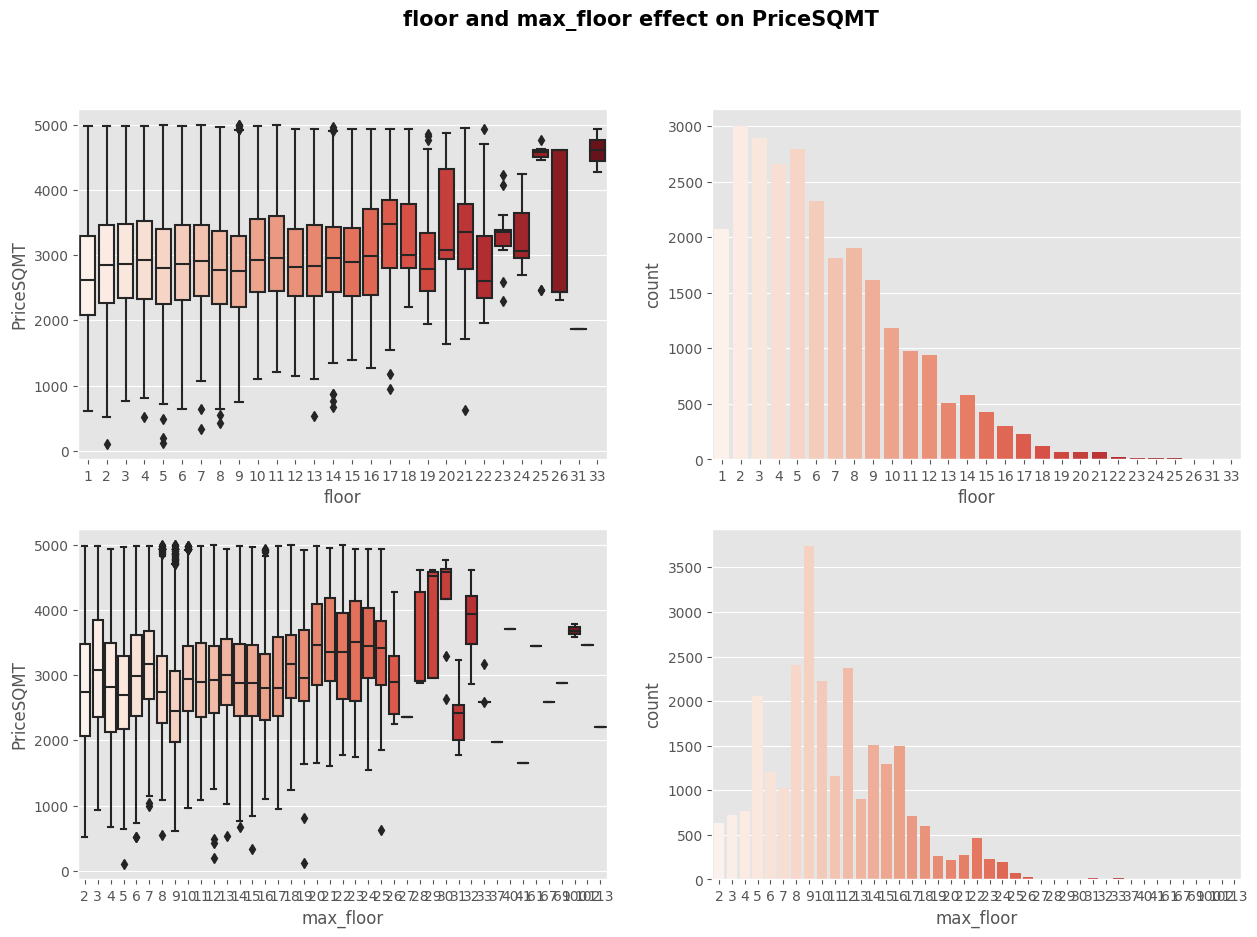

In [54]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.boxplot(df,x='floor',y='PriceSQMT',ax=axes.ravel()[0],palette='Reds')
sns.countplot(df,x='floor',ax=axes.ravel()[1],palette='Reds')
sns.boxplot(df,x='max_floor',y='PriceSQMT',ax=axes.ravel()[2],palette='Reds')
sns.countplot(df,x='max_floor',ax=axes.ravel()[3],palette='Reds')
plt.suptitle('floor and max_floor effect on PriceSQMT',fontweight='bold',size=15)
plt.show()

In [55]:
#removing nan values

bad_index=df[df.isna().any(axis=1)].index
df=df[df.index.isin(bad_index)==False]

In [56]:
for col in df.select_dtypes('O'):
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

In [57]:
df.sample()

,room,bedroom,furniture,latitude,longitude,floor,max_floor,balcony,PriceSQMT,city_area_Chugureti District,city_area_Didube District,city_area_Gldani District,city_area_Isani District,city_area_Krtsanisi District,city_area_Mtatsminda District,city_area_Nadzaladevi District,city_area_Other,city_area_Saburtalo District,city_area_Samgori District,city_area_Vake District,apartment_type_construction,apartment_type_new,apartment_type_old,renovation_type_black frame,renovation_type_green frame,renovation_type_newly renovated,renovation_type_not renovated,renovation_type_old renovation,renovation_type_under renovation,renovation_type_white frame
9778,2,1,0,41.702684,44.804652,1,3,0,2922.580645,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Machine learning 

In [58]:
X=df.drop(columns='PriceSQMT')
y=df['PriceSQMT']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

###### GreadSearchCV parameter tuning for the best parameter combination
model=XGBRegressor()
params={ 'learning_rate':[0.01,0.02,0.05], 'max_depth':[2,3,7], 'n_estimators':[200,300,500] }
gs=GridSearchCV(model,params,n_jobs=1,verbose=10,cv=3)
gs.fit(X_train,y_train)
print(gs.best_params_)
print(gs.best_score_)

In [60]:
model=XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=1000)

In [61]:
%%time

model.fit(X_train,y_train)

CPU times: total: 1min 31s
Wall time: 25.2 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [63]:
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.7645572090585819 0.5215573560754285
247.0706705016117 346.28389701932986
342.2692732469415 475.8899833437753


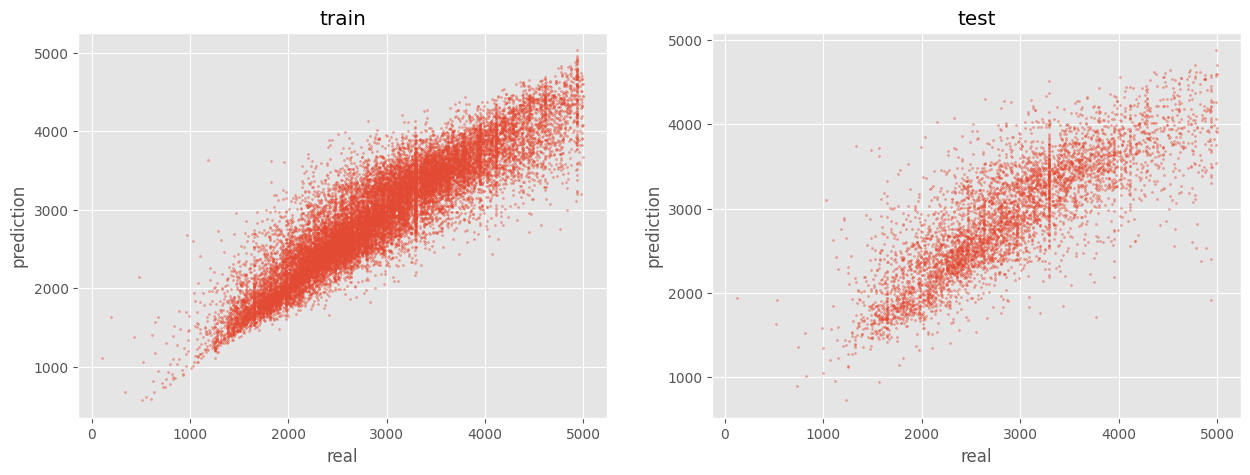

In [64]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction,s=2,alpha=0.4)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction,s=2,alpha=0.4)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

# Error Analysis 

In [65]:
X_test['Real']=y_test
X_test['Prediction']=test_prediction

test=X_test.reset_index(drop=True)

In [66]:
test['Error']=abs(test['Real']-test['Prediction'])

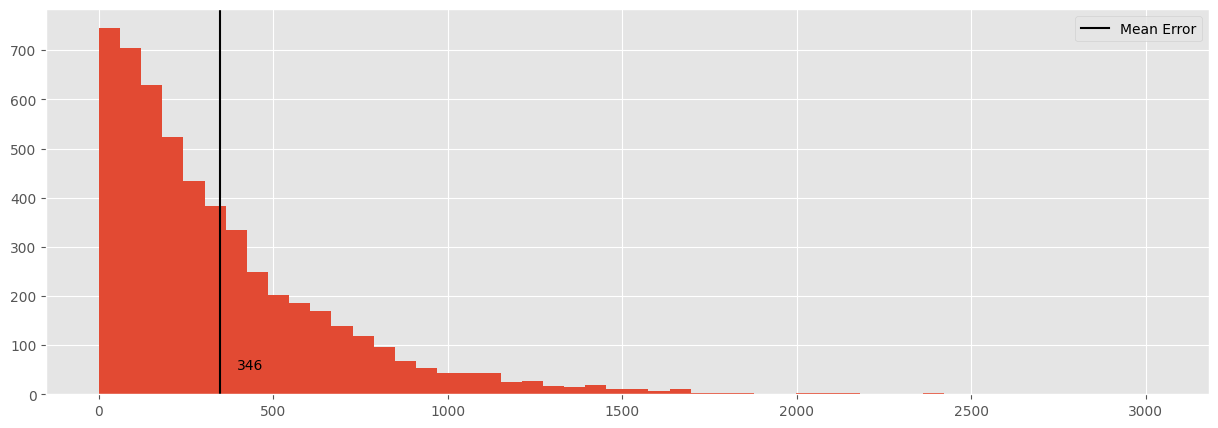

In [67]:
plt.figure(figsize=(15,5))
test['Error'].hist(bins=50)
plt.axvline(test['Error'].mean(),color='black',label='Mean Error')
plt.text(test['Error'].mean()+50,50,int(test['Error'].mean()))
plt.legend()
plt.show()

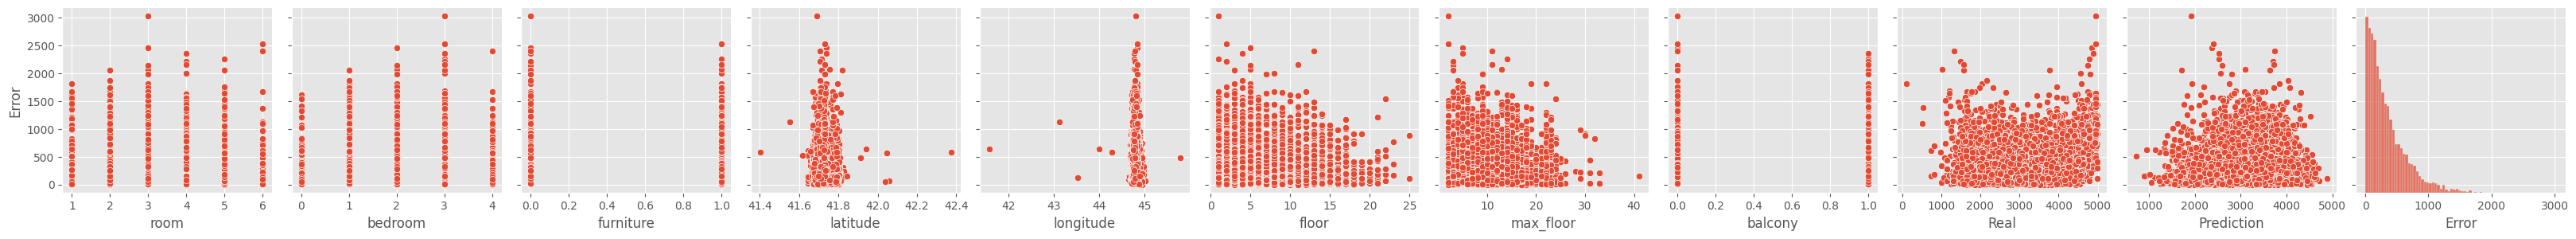

In [68]:
sns.pairplot(data=test,height=3,
                  y_vars=['Error'],
                  x_vars=test.select_dtypes(['float',"int"]).columns)
plt.show()

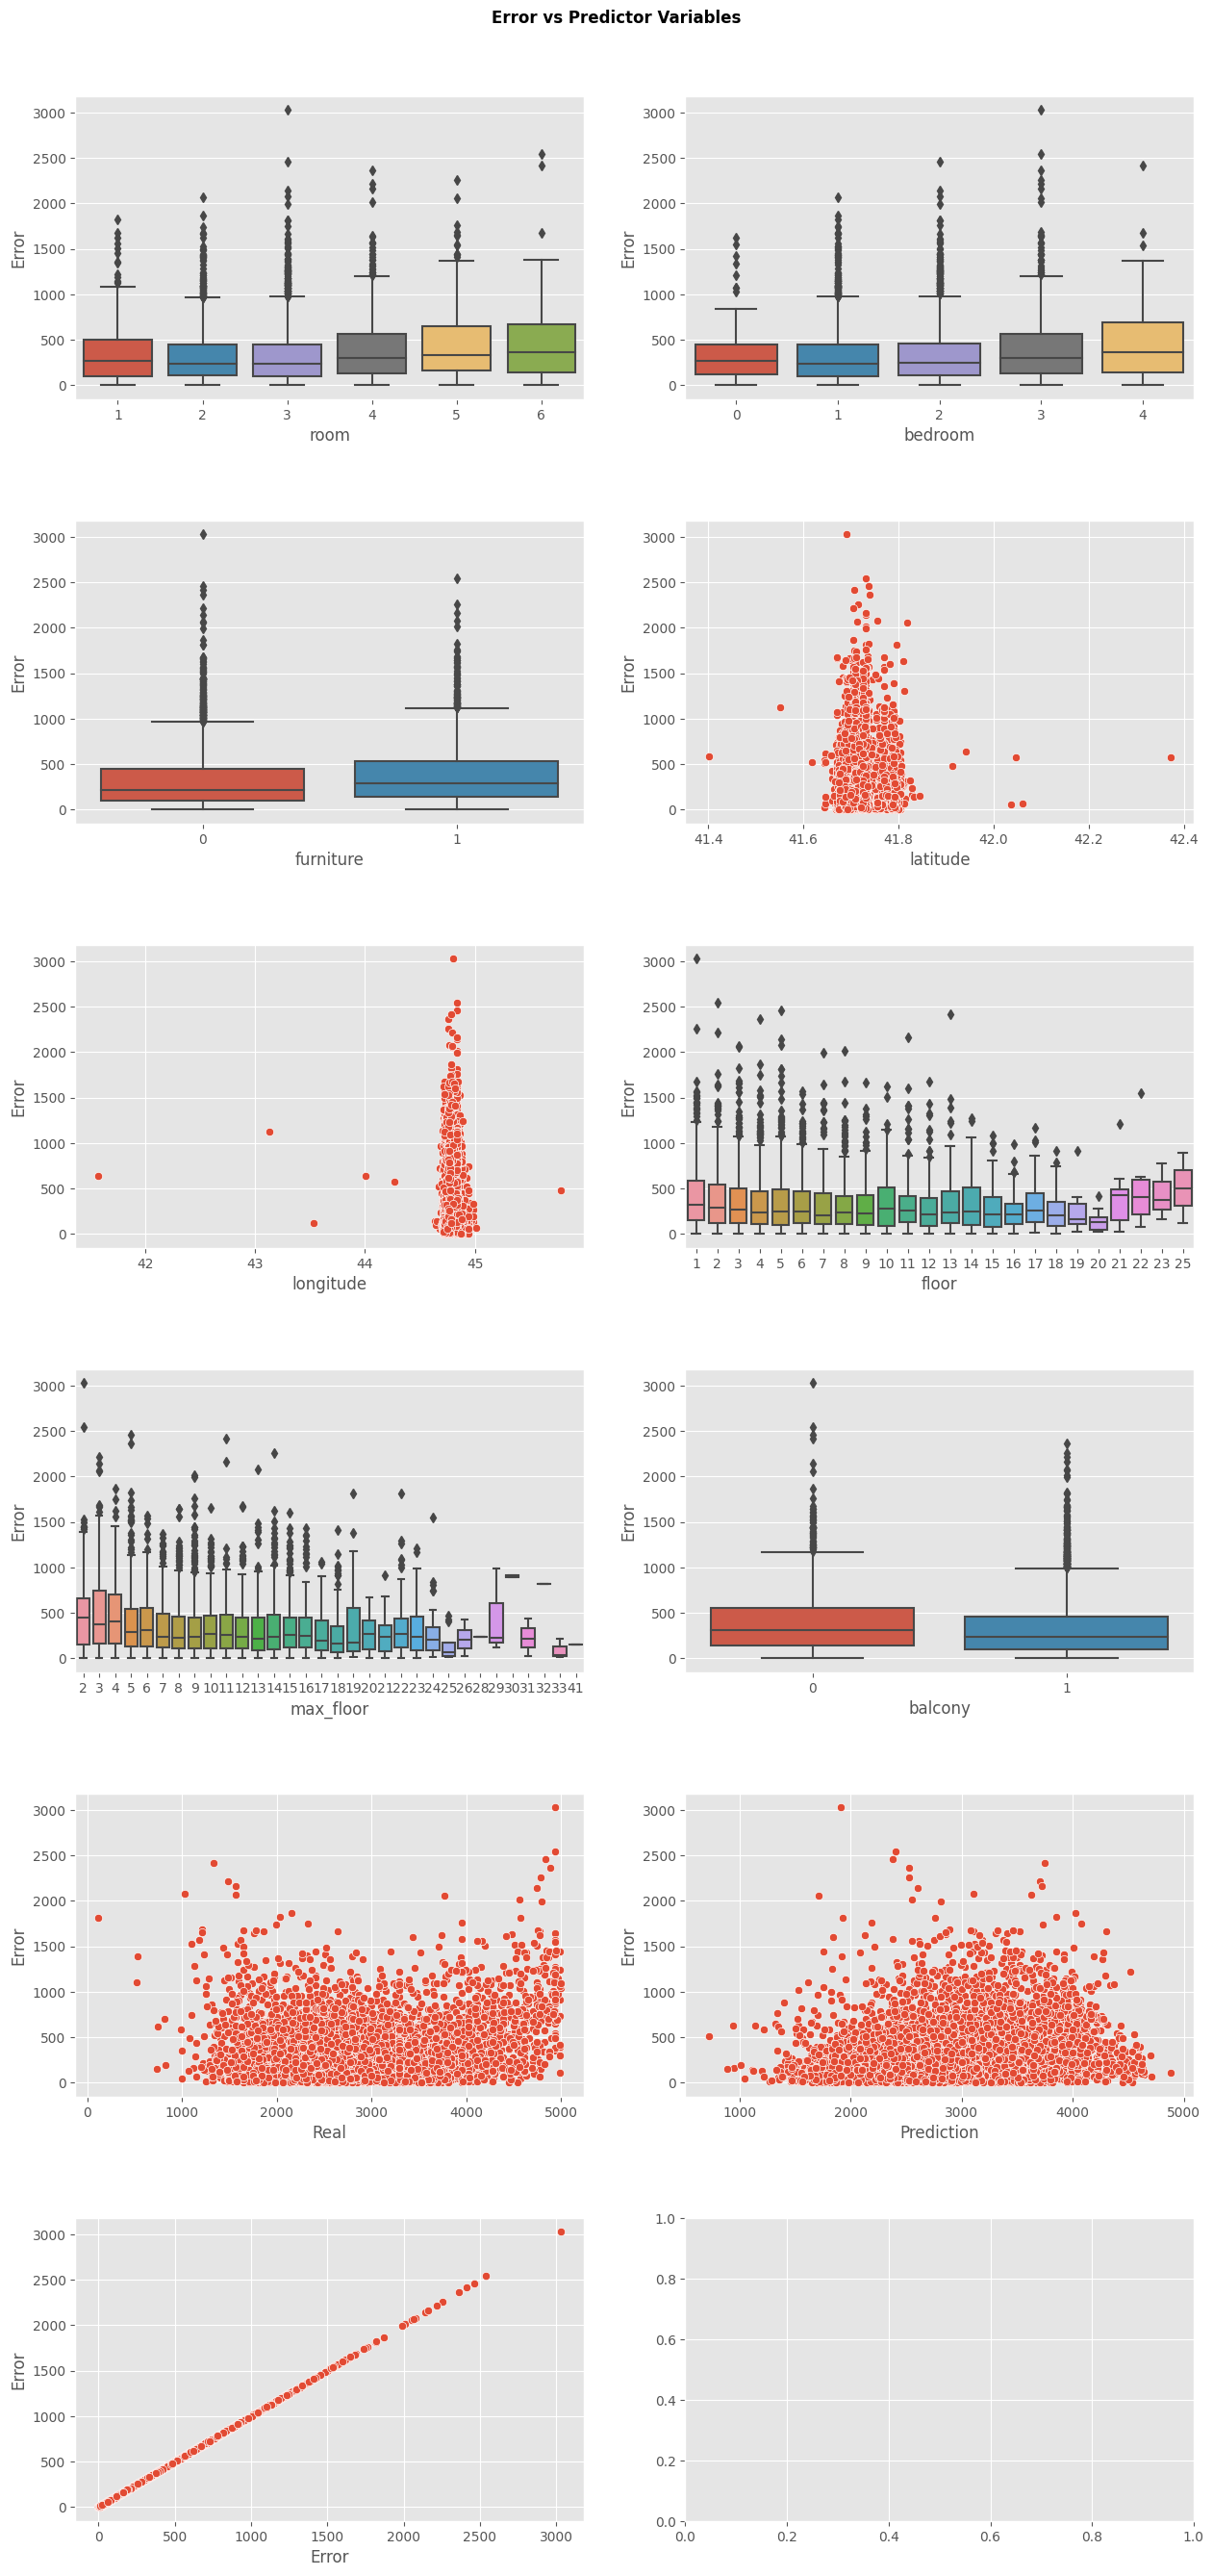

In [73]:
columns=test.select_dtypes(['int','float']).columns
fig,axes=plt.subplots(6,2,figsize=(15,30))


for i,col in enumerate(columns):
    if test[col].nunique()<40:
        sns.boxplot(test,x=col,y='Error',ax=axes.ravel()[i])
    else:
        sns.scatterplot(test,x=col,y='Error',ax=axes.ravel()[i])
plt.suptitle('Error vs Predictor Variables',fontweight='bold')
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.show()

In [70]:
# Error increases when the Apartments real price per SQMT is less than 2000 or more than 4000